thyroid dataset

In [18]:
import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
## Importing required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

# Define function for plotting history
import matplotlib.pyplot as plt
def plot_metrics(history, metrics =  ['loss', 'acc']):
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    #plt.figsize=(20,10)
    plt.subplot(1,len(metrics),n+1)
    plt.tight_layout(pad=2)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()
    
import sklearn
import seaborn as sns
#from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  names = np.unique(labels)
  #print() 
  df_cm = pd.DataFrame(cm, names,names)
  print(cm)
  plt.figure(figsize=(8,8))
  sns.heatmap(df_cm, annot=True, fmt="d")
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

import pandas as pd
train = pd.read_csv('ann-train.data', header=None, sep=" ") 
y_train=train[21]
train.drop([21,22,23],axis=1, inplace=True)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0.00060,0.015,0.120,0.082,0.146
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00025,0.030,0.143,0.133,0.108
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00190,0.024,0.102,0.131,0.078
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00090,0.017,0.077,0.090,0.085
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00025,0.026,0.139,0.090,0.153


In [19]:
print("Classes -> number of representatives:")
print(y_train.value_counts())
times_class1 = y_train.value_counts()[3]//y_train.value_counts()[1]
times_class2 = y_train.value_counts()[3]//y_train.value_counts()[2]
print("Times more needed for class 1 -> ", times_class1)
print("Times more needed for class 2 -> ", times_class2)

Classes -> number of representatives:
3    3488
2     191
1      93
Name: 21, dtype: int64
Times more needed for class 1 ->  37
Times more needed for class 2 ->  18


Create more records for underrepresented classes 

In [23]:
from sklearn.utils import resample
# Resampling Techniques — Oversample minority class
    # separate minority and majority classes
    # Create more records for underrepresented classes
class1indexes = y_train.loc[y_train == 1]
class2indexes = y_train.loc[y_train == 2]
class3indexes = y_train.loc[y_train == 3]

#class2indexes.head()

class1 = train.loc[class1indexes.index]
class2 = train.loc[class2indexes.index]
class3 = train.loc[class3indexes.index]
# upsample minority
one_upsampled = resample(class1,
                          replace=True, # sample with replacement
                          n_samples=len(class3), # match number in majority class
                          random_state=27) # reproducible results
one_upsampled[21] = pd.Series(1, index=one_upsampled.index) 
print(one_upsampled.shape)
two_upsampled = resample(class2,
                          replace=True, # sample with replacement
                          n_samples=len(class3), # match number in majority class
                          random_state=27) # reproducible results
two_upsampled[21] = pd.Series(2, index=two_upsampled.index)
print(two_upsampled.shape)
two_upsampled.head()

(3488, 22)
(3488, 22)


/Users/iostaptchenko/projects/secret/wsu/ds/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/iostaptchenko/projects/secret/wsu/ds/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
695,0.76,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0110,0.0120,0.086,0.085,0.101,2
3667,0.18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0120,0.0174,0.142,0.137,0.104,2
1708,0.42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0130,0.0190,0.061,0.082,0.074,2
908,0.80,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0061,0.0130,0.083,0.088,0.095,2
1462,0.76,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0075,0.0208,0.089,0.114,0.078,2


Append repeated records of class 1 and 2  to the training dataframe.


In [25]:
print("Training data shape: ",train.shape)
train[21] = y_train
print("Training data shape with yZ: ",train.shape)
train = train.append(one_upsampled,ignore_index=True).append(two_upsampled,ignore_index=True).sample(frac=1)
#train.reset_index(inplace=True, drop=True)
print("New Training data shape: ",train.shape)
train.head()

Training data shape:  (3772, 21)
Training data shape with yZ:  (3772, 22)
New Training data shape:  (10748, 22)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
10371,0.16,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.0062,0.0174,0.108,0.114,0.09400,2
9613,0.70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0062,0.0180,0.124,0.111,0.11200,2
9117,0.33,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.0160,0.0170,0.075,0.100,0.07492,2
597,0.46,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0.0014,0.0160,0.086,0.074,0.11100,3
3411,0.60,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.0000,0.0150,0.132,0.095,0.13800,3


In [26]:
# keep the class labels of training dataframe
y_train=train[21]
print("yZ of training data shape: ",y_train.shape)
# remove lables from training dataframe
train.drop([21],axis=1, inplace=True)
print("training data shape: ",train.shape)
print("Classes -> number of representatives:")
print(y_train.value_counts())


yZ of training data shape:  (10748,)
training data shape:  (10748, 21)
Classes -> number of representatives:
2    3679
1    3581
3    3488
Name: 21, dtype: int64


In [27]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
train = pd.DataFrame(scaler.transform(train), index=train.index, columns=train.columns)
train.head()


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
10371,-1.872844,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,2.891776,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.390938,0.182772,0.695750,0.705416,0.353811
9613,0.977345,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.390938,0.257968,1.078262,0.542333,0.788494
9117,-0.975562,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,2.891776,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.259464,0.132641,-0.093179,-0.055635,-0.106952
597,-0.289406,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,5.672111,-0.455334,0.007315,0.169797,-1.469016,0.764345
3411,0.449532,-0.580788,3.531101,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.474116,-0.118012,1.269518,-0.327439,1.416370


In [28]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,1.074800e+04,1.074800e+04,1.074800e+04,1.074800e+04,1.074800e+04,1.074800e+04,1.074800e+04,1.074800e+04,1.074800e+04,1.074800e+04,...,1.074800e+04,1.074800e+04,1.074800e+04,1.074800e+04,1.074800e+04,1.074800e+04,1.074800e+04,1.074800e+04,1.074800e+04,1.074800e+04
mean,6.439046e-16,1.851060e-17,8.891701e-17,5.189580e-17,3.636011e-18,-5.916782e-17,1.057749e-17,6.148165e-17,3.834339e-17,-2.545208e-17,...,1.123858e-17,-1.818006e-17,-1.652732e-17,-3.636011e-18,2.644372e-17,4.660706e-17,-2.841047e-16,8.098389e-18,3.801285e-17,2.974918e-16
std,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,...,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00
min,-2.664563e+00,-5.807882e-01,-2.831978e-01,-9.932593e-02,-7.237099e-02,-1.815624e-01,-7.039593e-02,-1.080356e-01,-1.308770e-01,-3.458082e-01,...,-5.797169e-02,-5.549590e-02,-1.623453e-01,-9.646203e-03,-1.763012e-01,-4.741156e-01,-1.935249e+00,-1.838388e+00,-4.458860e+00,-1.867901e+00
25%,-7.644373e-01,-5.807882e-01,-2.831978e-01,-9.932593e-02,-7.237099e-02,-1.815624e-01,-7.039593e-02,-1.080356e-01,-1.308770e-01,-3.458082e-01,...,-5.797169e-02,-5.549590e-02,-1.623453e-01,-9.646203e-03,-1.763012e-01,-4.446010e-01,-7.446457e-01,-7.386675e-01,-6.536042e-01,-6.845978e-01
50%,1.328445e-01,-5.807882e-01,-2.831978e-01,-9.932593e-02,-7.237099e-02,-1.815624e-01,-7.039593e-02,-1.080356e-01,-1.308770e-01,-3.458082e-01,...,-5.797169e-02,-5.549590e-02,-1.623453e-01,-9.646203e-03,-1.763012e-01,-3.454588e-01,1.326413e-01,7.416927e-02,-5.563536e-02,1.123209e-01
75%,8.190012e-01,1.721798e+00,-2.831978e-01,-9.932593e-02,-7.237099e-02,-1.815624e-01,-7.039593e-02,-1.080356e-01,-1.308770e-01,-3.458082e-01,...,-5.797169e-02,-5.549590e-02,-1.623453e-01,-9.646203e-03,-1.763012e-01,-5.822834e-02,5.838175e-01,6.479364e-01,5.423335e-01,6.677490e-01
max,2.244096e+00,1.721798e+00,3.531101e+00,1.006786e+01,1.381769e+01,5.507747e+00,1.420537e+01,9.256210e+00,7.640760e+00,2.891776e+00,...,1.724980e+01,1.801935e+01,6.159710e+00,1.036677e+02,5.672111e+00,6.636215e+00,1.127419e+01,8.393793e+00,7.119990e+00,1.286302e+01


In [29]:
test = pd.read_csv('ann-test.data', header=None, sep=" ") 
y_test=test[21]
test.drop([21,22,23],axis=1, inplace=True)
print("test data shape: ",test.shape)
print("Classes -> number of representatives:")
print(y_test.value_counts())
test = pd.DataFrame(scaler.transform(test), index=test.index, columns=test.columns)
test.head()


test data shape:  (3428, 21)
Classes -> number of representatives:
3    3178
2     177
1      73
Name: 21, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.186687,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.392280,1.511235,0.767471,1.629549,0.136470
1,-1.028344,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.456675,0.383295,0.121983,-1.251573,0.667749
2,-0.870000,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.474116,1.887215,3.827563,-0.055635,3.855424
3,-1.608938,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.460700,0.257968,0.193704,-0.707965,0.474557
4,-1.556156,-0.580788,-0.283198,-0.099326,-0.072371,5.507747,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.468749,0.759275,1.317331,1.846993,0.474557


In [30]:
## Changing labels to one-hot encoded vector

lb = LabelBinarizer()
y_train_one_hot = lb.fit_transform(y_train)
y_test_one_hot = lb.transform(y_test)
print('Train labels dimension:');print(y_train_one_hot.shape)
print('Test labels dimension:');print(y_test_one_hot.shape)
print(y_train_one_hot[100])

Train labels dimension:
(10748, 3)
Test labels dimension:
(3428, 3)
[0 1 0]


Text(0.5, 1.0, 'Density Plot for features in Training Dataset')

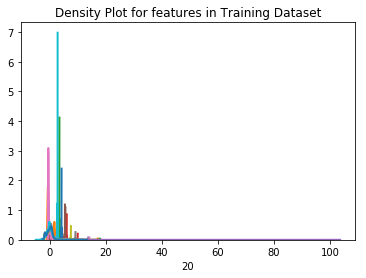

In [31]:
# Iterate through the features
for i in train.columns:
    # Draw the density plot
    sns.distplot(train[i], hist = False, kde = True,
                 kde_kws = {'linewidth': 2})
    
plt.title('Density Plot for features in Training Dataset')

/Users/iostaptchenko/projects/secret/wsu/ds/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/iostaptchenko/projects/secret/wsu/ds/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Text(0.5, 1.0, 'Density Plot for Features in Test Dataset')

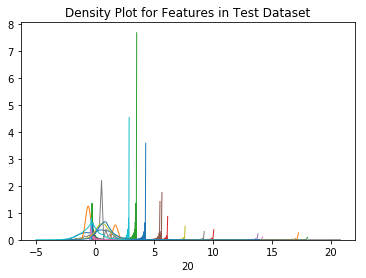

In [32]:
# Iterate through the features
for i in test.columns:
    # Draw the density plot
    sns.distplot(test[i], hist = False, kde = True,
                 kde_kws = {'linewidth': 1})
    
plt.title('Density Plot for Features in Test Dataset')

## Model 1 21-32-32-1

In [57]:
# Defining various initialization parameters for 21-32-32-1 MLP model
from keras.metrics import categorical_accuracy

num_classes = y_train_one_hot.shape[1]; num_features = train.shape[1]
num_layers_0 = 32; num_layers_1 = 32

# Define the keras model
model = Sequential()
model.add(Dense(num_layers_0, input_dim=num_features, activation='linear'))
model.add(Dense(num_layers_1, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

# Compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
# Fit keras model
history = model.fit(train, y_train_one_hot, epochs=5, batch_size=32, validation_split = 0.20)

Train on 8598 samples, validate on 2150 samples
Epoch 1/5
8598/8598 [==============================] - 1s 124us/step - loss: 0.5891 - categorical_accuracy: 0.7424 - val_loss: 0.3994 - val_categorical_accuracy: 0.8284
Epoch 2/5
8598/8598 [==============================] - 0s 46us/step - loss: 0.3762 - categorical_accuracy: 0.8160 - val_loss: 0.3465 - val_categorical_accuracy: 0.8372
Epoch 3/5
8598/8598 [==============================] - 0s 43us/step - loss: 0.3256 - categorical_accuracy: 0.8546 - val_loss: 0.2976 - val_categorical_accuracy: 0.8800
Epoch 4/5
8598/8598 [==============================] - 0s 43us/step - loss: 0.2710 - categorical_accuracy: 0.8880 - val_loss: 0.2465 - val_categorical_accuracy: 0.9191
Epoch 5/5
8598/8598 [==============================] - 0s 44us/step - loss: 0.2120 - categorical_accuracy: 0.9303 - val_loss: nan - val_categorical_accuracy: 0.9219


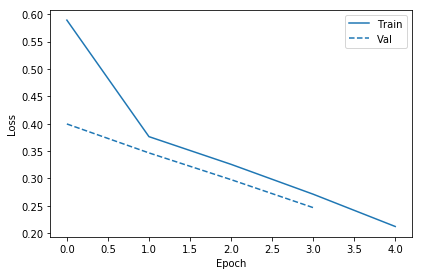

In [58]:
# Plot the training/validation history of our Keras model
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_metrics(history,  metrics =  ['loss'])

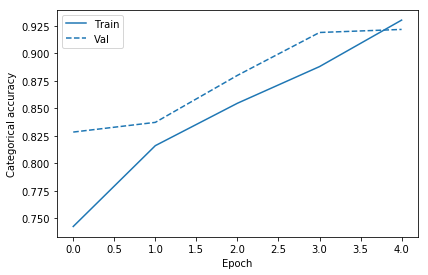

In [59]:
plot_metrics(history,  metrics =  ['categorical_accuracy']) 

In [64]:
y_test_predictions = model.predict_classes(test, batch_size=2)
baseline_results = model.evaluate(test, y_test_one_hot,
                                  batch_size=2, verbose=1)

#y_test_predictions_one_hot = lb.transform(y_test_predictions)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
  print()
    
print(baseline_results)


3428/3428 [==============================] - 1s 358us/step
loss :  0.2882766517508153

categorical_accuracy :  0.9218203033838973

[0.2882766517508153, 0.9218203033838973]


In [65]:
#y_test_predictions = y_test_predictions+1
y_test_predictions

array([1, 2, 2, ..., 2, 2, 2])

In [66]:
y_test.values

array([2, 3, 3, ..., 3, 3, 3])

[[  66    7    0]
 [   0  128   49]
 [  46  166 2966]]
Classes -> number of representatives:
3    3178
2     177
1      73
Name: 21, dtype: int64


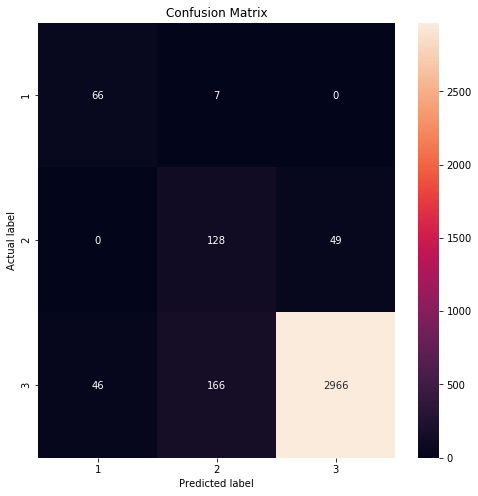

In [67]:
plot_cm(y_test.values, y_test_predictions+1)
print("Classes -> number of representatives:")
print(y_test.value_counts())

3 dense layers model

In [40]:
# Define the keras model 21-16-32-16-1 MLP model
model2 = Sequential()
model2.add(Dense(16, input_dim=21, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='sigmoid'))
model2.add(Dense(3, activation='sigmoid'))

# Compile the keras model
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])
# Fit keras model
history2 = model2.fit(train, y_train_one_hot, epochs=64, validation_split = 0.20)

Train on 8598 samples, validate on 2150 samples
Epoch 1/64
8598/8598 [==============================] - 1s 66us/step - loss: 0.8510 - categorical_accuracy: 0.6299 - val_loss: 0.5919 - val_categorical_accuracy: 0.7577
Epoch 2/64
8598/8598 [==============================] - 0s 45us/step - loss: 0.5233 - categorical_accuracy: 0.7760 - val_loss: 0.4657 - val_categorical_accuracy: 0.7991
Epoch 3/64
8598/8598 [==============================] - 0s 42us/step - loss: 0.4432 - categorical_accuracy: 0.7987 - val_loss: 0.4096 - val_categorical_accuracy: 0.8116
Epoch 4/64
8598/8598 [==============================] - 0s 43us/step - loss: 0.4036 - categorical_accuracy: 0.8116 - val_loss: 0.3747 - val_categorical_accuracy: 0.8381
Epoch 5/64
8598/8598 [==============================] - 0s 38us/step - loss: 0.3764 - categorical_accuracy: 0.8250 - val_loss: 0.3552 - val_categorical_accuracy: 0.8358
Epoch 6/64
8598/8598 [==============================] - 0s 38us/step - loss: 0.3504 - categorical_accuracy:

Epoch 49/64
8598/8598 [==============================] - 0s 43us/step - loss: 0.0251 - categorical_accuracy: 0.9942 - val_loss: 0.0376 - val_categorical_accuracy: 0.9921
Epoch 50/64
8598/8598 [==============================] - 0s 44us/step - loss: 0.0242 - categorical_accuracy: 0.9946 - val_loss: 0.0393 - val_categorical_accuracy: 0.9944
Epoch 51/64
8598/8598 [==============================] - 0s 43us/step - loss: 0.0236 - categorical_accuracy: 0.9943 - val_loss: 0.0407 - val_categorical_accuracy: 0.9893
Epoch 52/64
8598/8598 [==============================] - 0s 42us/step - loss: 0.0236 - categorical_accuracy: 0.9943 - val_loss: 0.0385 - val_categorical_accuracy: 0.9907
Epoch 53/64
8598/8598 [==============================] - 0s 42us/step - loss: 0.0235 - categorical_accuracy: 0.9946 - val_loss: 0.0434 - val_categorical_accuracy: 0.9902
Epoch 54/64
8598/8598 [==============================] - 0s 44us/step - loss: 0.0236 - categorical_accuracy: 0.9945 - val_loss: 0.0413 - val_categoric

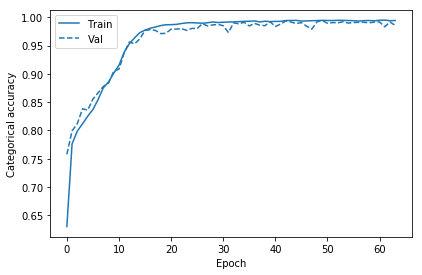

In [41]:
plot_metrics(history2, metrics =  ['categorical_accuracy'])

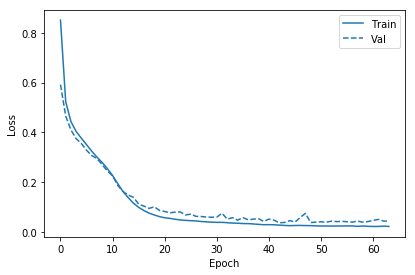

In [42]:
plot_metrics(history2, metrics =  ['loss'])

3428/3428 [==============================] - 2s 455us/step
loss :  0.23629740071550248

categorical_accuracy :  0.9597432905484248

[[  61    9    3]
 [   0  151   26]
 [  27   73 3078]]


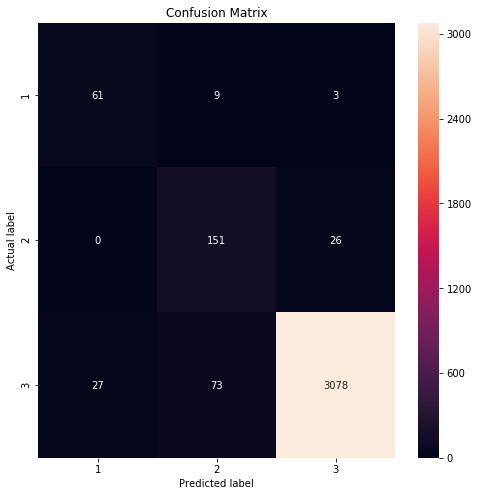

In [43]:
y_test_predictions = model2.predict_classes(test, batch_size=1)
baseline_results = model2.evaluate(test, y_test_one_hot,
                                  batch_size=1, verbose=1)

for name, value in zip(model2.metrics_names, baseline_results):
  print(name, ': ', value)
  print()
    
plot_cm(y_test.values, y_test_predictions+1)
